<a href="https://colab.research.google.com/github/SheilaLiborio/regressao_logistica_doencas_cardiacas/blob/main/Desafio_Modelos_de_Classifica%C3%A7%C3%A3o_Doen%C3%A7as_Card%C3%ADacas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge: Modelos de Classificação - Doenças Cardíacas


**Contexto**

O conjunto de dados utilizado é o Statlog Heart Disease, disponível no repositório UCI. Ele contém informações de 270 indivíduos e é composto por 14 colunas, selecionadas a partir de um conjunto maior que continha 75 colunas. **Nesse conjunto, não há valores ausentes.**

O objetivo desse conjunto de dados é realizar uma tarefa de classificação, onde se deve prever se uma pessoa tem ou não tem doença cardíaca. A variável de saída (o que queremos prever) é binária, sendo:
- 0: a pessoa não sofre de doença cardíaca.
- 1: a pessoa sofre de doença cardíaca.

Este é um estudo importante porque a saúde é um ponto vital de pesquisa para melhor ajudar os pacientes com certas condições. Além disso, a pressão arterial geralmente não apresenta sintomas e, no entanto, se a pressão alta não for tratada, pode ser um grande contribuinte para condições de saúde mais graves, como um derrame ou ataque cardíaco [2].

**Dicionário de dados**

 Este banco de dados contém 13 atributos e uma variável de destino. **Possui 8 valores nominais e 5 valores numéricos.** A descrição detalhada de todos esses recursos é a seguinte:
- Age: idade dos pacientes em anos
- Sex: (Masculino: 1; Feminino: 0)
- cp: Tipo de dor torácica sentida pelo paciente. Este termo é categorizado em 4 categorias.
    - 0 angina típica,
    - 1 angina atípica,
    - 2 dor não anginosa,
    - 3 assintomática
- trestbps: nível de pressão arterial do paciente no modo de repouso em mm/HG
- chol: colesterol sérico em mg/dl
- fbs: Níveis de açúcar no sangue em jejum > 120 mg/dl representa:
    - 1 em caso de verdadeiro
    - 0 como falso (Nominal)
- restecg: O resultado do eletrocardiograma em repouso é representado em 3 valores distintos
    - 0: Normal
    - 1: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV)
    - 2: mostrando provável ou definitiva hipertrofia ventricular esquerda por Critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: Angina induzida pelo exercício
    - 0 retratando Não
    - retratando Sim
- oldpeak: Depressão do ST induzida pelo exercício em relação ao estado de repouso
- slope: segmento ST medido em termos de inclinação durante o pico do exercício
    - 0: inclinação ascendente; ●
    - 1: plano;
    - 2: inclinação descendente
- ca: O número de vasos principais (0–3) (nominal)
- thal: Um distúrbio sanguíneo chamado talassemia
    - 0: NULO
    - 1: fluxo sanguíneo normal
    - 2: defeito fixo (sem fluxo sanguíneo em alguma parte do coração)
    - 3: defeito reversível (um fluxo sanguíneo é observado, mas não é normal (nominal)
- target: É a variável alvo que temos que prever 1 significa que o paciente sofre de doença cardíaca e 0 significa que o paciente é normal.

**Perguntas:**

1- Faça uma análise exploratória dos dados, observando as principais variáveis e sua relação com a variável target.

2 - Construa um modelo de regressão logística para classificar se o indivíduo
sofre de doença cardíaca ou não.

3 - Analise o resultado da regressão logística e plote a matriz de confusão.

# 1- Análise Explorátoria dos Dados

In [ ]:
#importando as bibliotecas

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
# lendo a base csv
df= pd.read_csv('Heart_disease_statlog.csv')

In [ ]:
# Exibindo as 10 primeiras linhas da base
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0
5,65,1,3,120,177,0,0,140,0,0.4,0,0,3,0
6,56,1,2,130,256,1,2,142,1,0.6,1,1,2,1
7,59,1,3,110,239,0,2,142,1,1.2,1,1,3,1
8,60,1,3,140,293,0,2,170,0,1.2,1,2,3,1
9,63,0,3,150,407,0,2,154,0,4.0,1,3,3,1


In [ ]:
# quantidade de observacoes (linhas e colunas)
df.shape

(270, 14)

In [ ]:
# Verificando a estrutura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [ ]:
#convertendo as colunas nominais para category
colunas_categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for col in colunas_categoricas:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       270 non-null    int64   
 1   sex       270 non-null    category
 2   cp        270 non-null    category
 3   trestbps  270 non-null    int64   
 4   chol      270 non-null    int64   
 5   fbs       270 non-null    category
 6   restecg   270 non-null    category
 7   thalach   270 non-null    int64   
 8   exang     270 non-null    category
 9   oldpeak   270 non-null    float64 
 10  slope     270 non-null    category
 11  ca        270 non-null    category
 12  thal      270 non-null    category
 13  target    270 non-null    int64   
dtypes: category(8), float64(1), int64(5)
memory usage: 16.0 KB


In [ ]:
#confirmando que não há valores nulos na base
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe(include=['category'])

,sex,cp,fbs,restecg,exang,slope,ca,thal
count,270,270,270,270,270,270,270,270
unique,2,4,2,3,2,3,4,3
top,1,3,0,2,0,0,0,1
freq,183,129,230,137,181,130,160,152


In [ ]:
df.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000
mean,54.433333,131.344444,249.659259,149.677778,1.05000,0.444444
std,9.109067,17.861608,51.686237,23.165717,1.14521,0.497827
min,29.000000,94.000000,126.000000,71.000000,0.00000,0.000000
25%,48.000000,120.000000,213.000000,133.000000,0.00000,0.000000
50%,55.000000,130.000000,245.000000,153.500000,0.80000,0.000000
75%,61.000000,140.000000,280.000000,166.000000,1.60000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.20000,1.000000


Text(0.5, 1.0, 'Contagem de Pessoas com Doença Cardíaca')

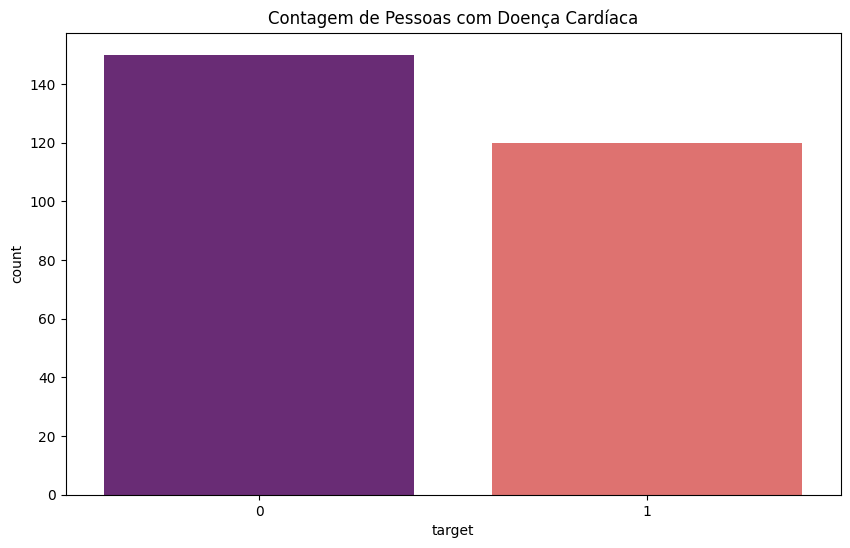

In [ ]:
palette = sns.color_palette("magma", len(df['target'].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(df, x="target",palette=palette).set_title('Contagem de Pessoas com Doença Cardíaca')

In [ ]:
df.target.value_counts(normalize = True)

,proportion
target,
0,0.555556
1,0.444444


In [ ]:
df.target.value_counts()

,count
target,
0,150
1,120


Temos uma base balanceada, com aproximadamente 56% de pessoas sem doença cardíaca e 44% com a doença.

## Análise das Váriavei Numéricas

In [ ]:
# calculando a matriz de correlação
corr =(df.select_dtypes(include=['float64', 'int64'])).corr()

corr

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.273053,0.220056,-0.402215,0.194234,0.212322
trestbps,0.273053,1.000000,0.173019,-0.039136,0.222800,0.155383
chol,0.220056,0.173019,1.000000,-0.018739,0.027709,0.118021
thalach,-0.402215,-0.039136,-0.018739,1.000000,-0.349045,-0.418514
oldpeak,0.194234,0.222800,0.027709,-0.349045,1.000000,0.417967
target,0.212322,0.155383,0.118021,-0.418514,0.417967,1.000000


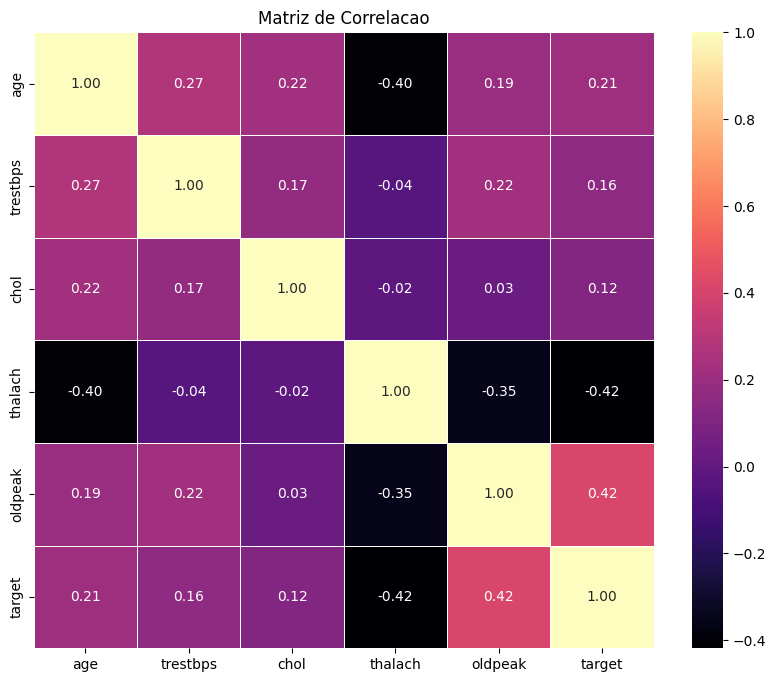

In [ ]:
# Plot do mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlacao')
plt.show()

In [ ]:
# Exibindo a correlação decrescente entre as variáveis numéricas e a variavel target
correlacao_target = corr['target'].sort_values(ascending=False)
correlacao_target.head(10)

,target
target,1.000000
oldpeak,0.417967
age,0.212322
trestbps,0.155383
chol,0.118021
thalach,-0.418514


Vemos uma correlação entre a variável target com oldpeak, age e trestbps:.
   - oldpeak: **Quanto maior** a depressão do ST, **maior** a chance de doenças cardiácas.
   - age: Mostra uma correlação fraca, mas positiva. Isso sugere que pessoas mais velhas têm uma probabilidade ligeiramente maior de apresentar doença cardíaca — algo também esperado clinicamente.
   - trestbps: Refere-se à pressão arterial em repouso. A correlação com target é muito fraca, sugerindo que esse fator isoladamente tem pouca influência sobre o diagnóstico da doença cardíaca. Isso pode ocorrer porque a hipertensão, apesar de ser um fator de risco, pode estar presente também em indivíduos sem doença cardíaca diagnosticada.

### Pairplot

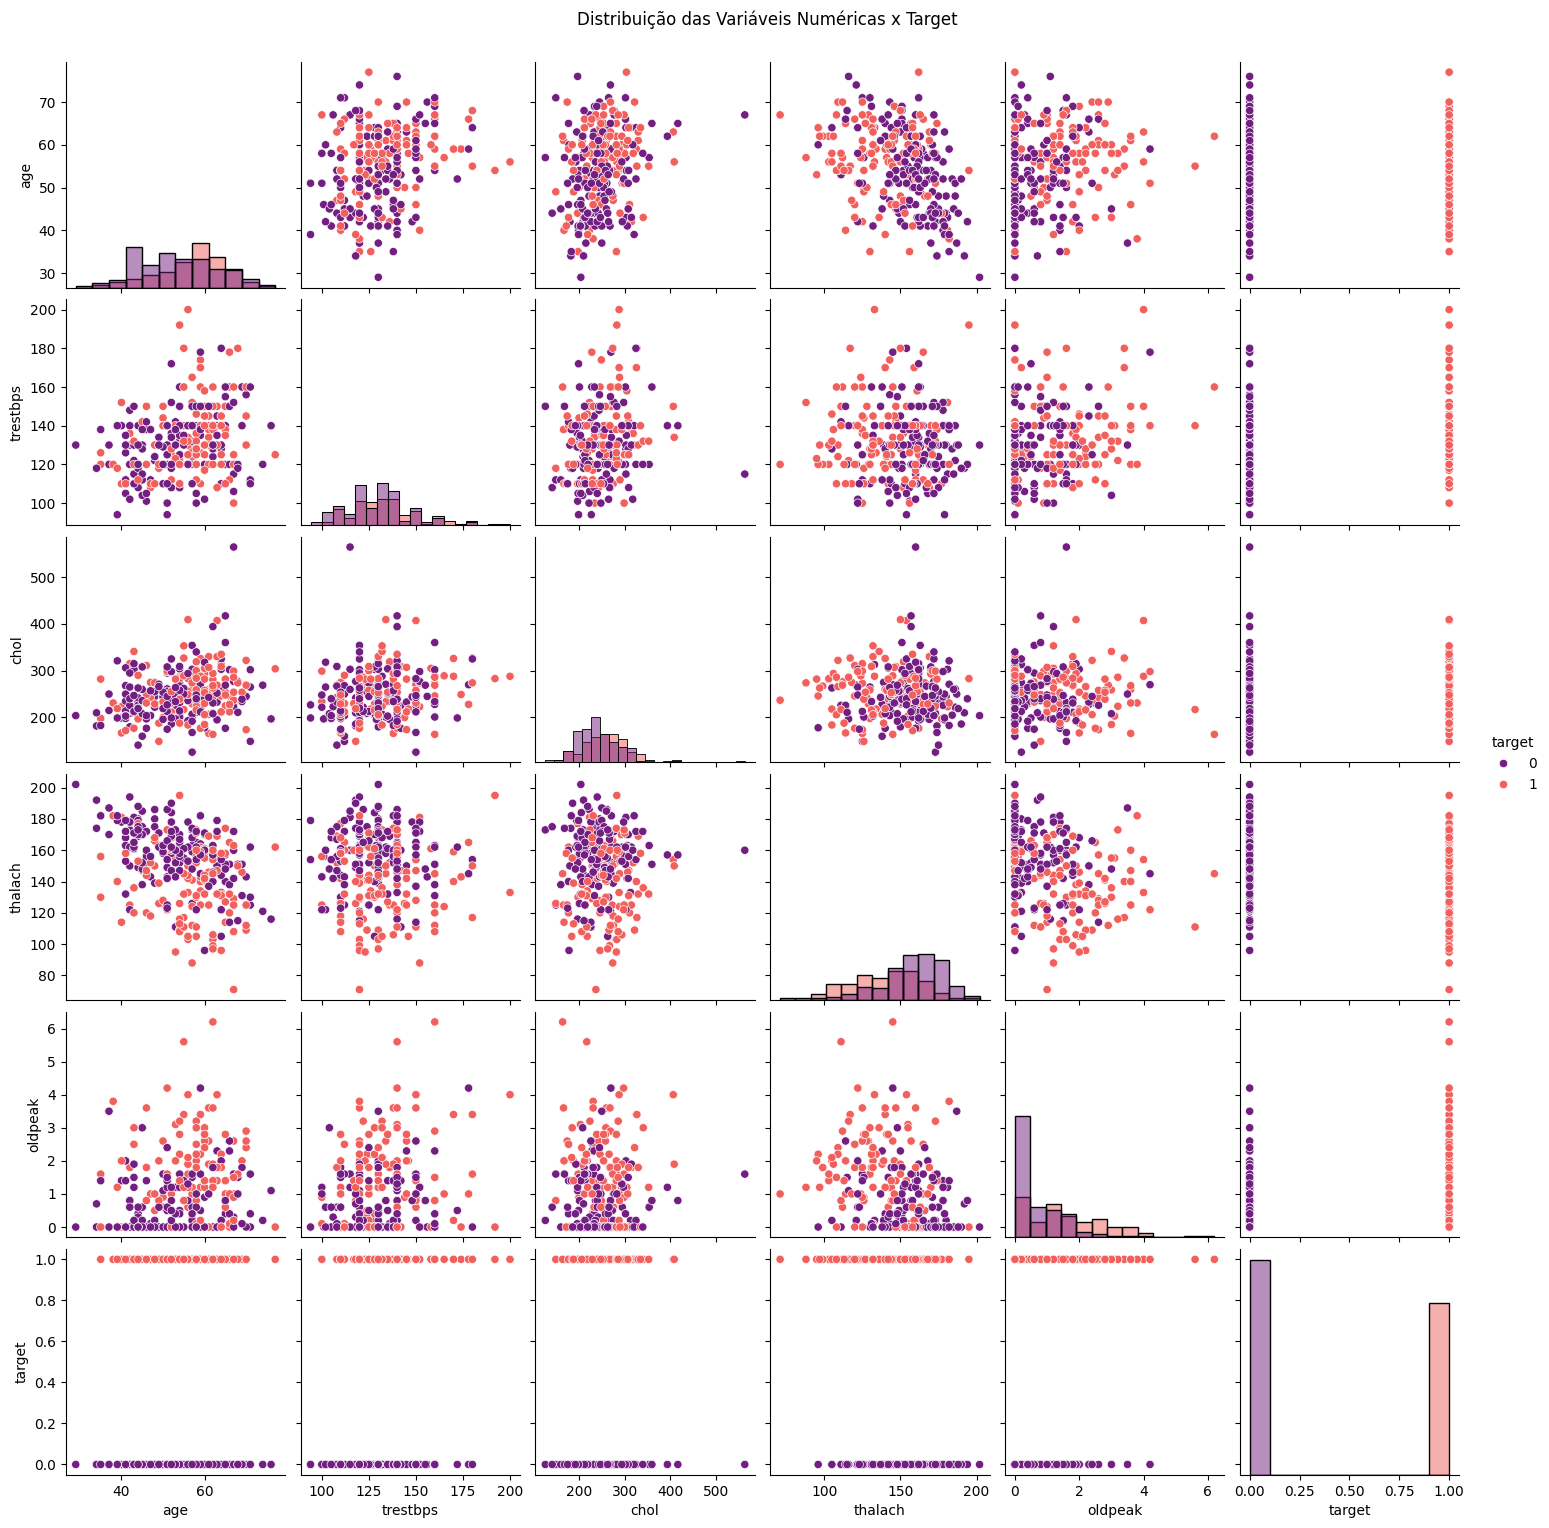

In [ ]:
c

### Scatterplot

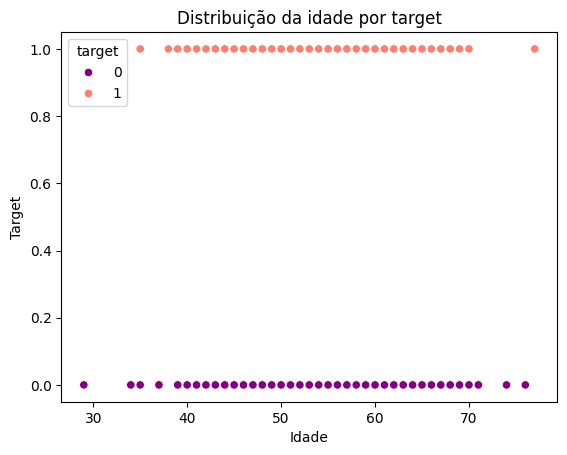

In [ ]:
sns.scatterplot(data=df, x='age', y='target', hue='target', palette={0: 'purple', 1: 'salmon'})
plt.title('Distribuição da idade por target')
plt.xlabel('Idade')
plt.ylabel('Target')
plt.show()

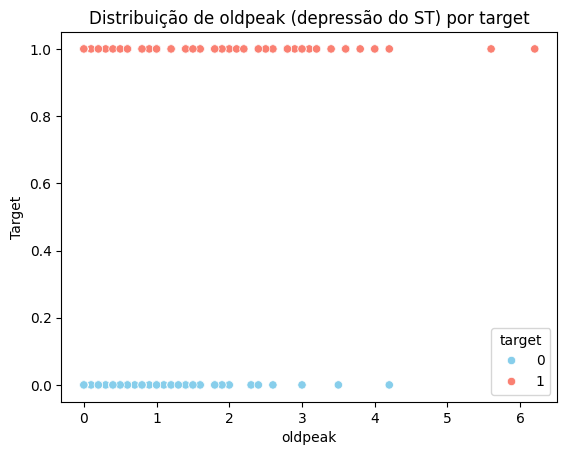

In [ ]:
sns.scatterplot(data=df, x='oldpeak', y='target', hue='target', palette={0: 'skyblue', 1: 'salmon'})
plt.title('Distribuição de oldpeak (depressão do ST) por target')
plt.xlabel('oldpeak')
plt.ylabel('Target')
plt.show()

### Histogramas

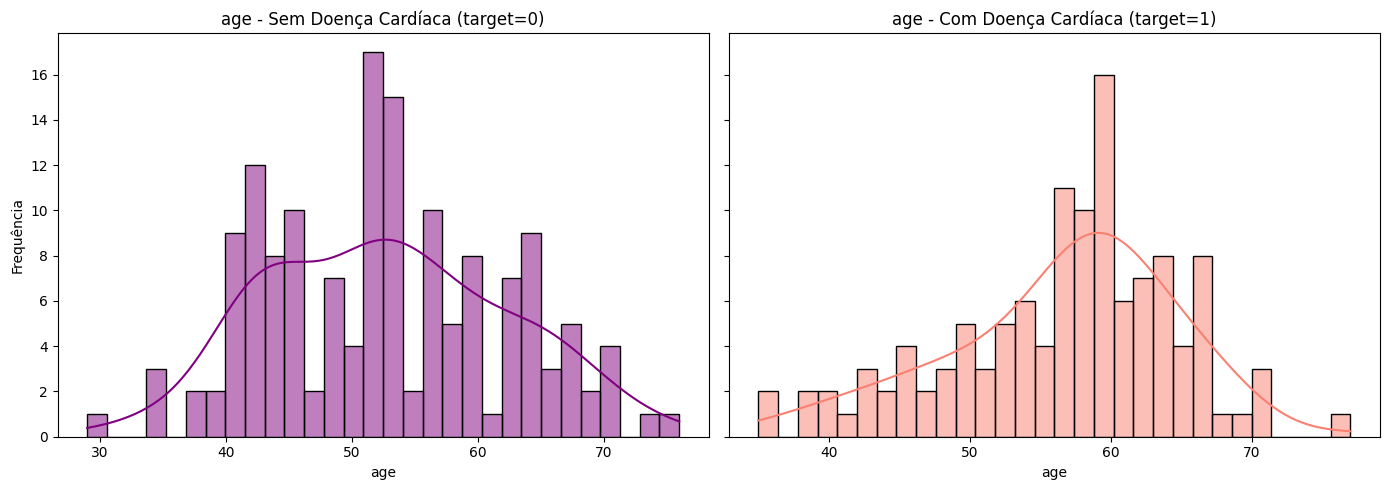

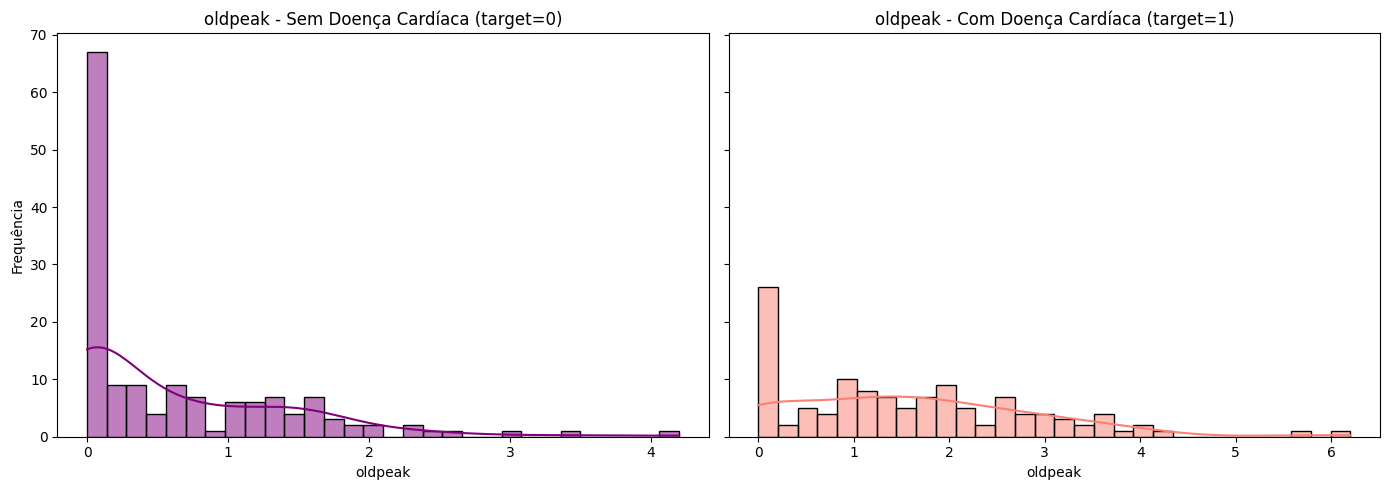

In [ ]:
# Distribuição das variáveis numéricas

num_vars = ['age', 'oldpeak']

for col in num_vars:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Classe 0 - sem doença
    sns.histplot(
        data=df[df['target'] == 0],
        x=col,
        kde=True,
        bins=30,
        color='purple',
        ax=axes[0]
    )
    axes[0].set_title(f'{col} - Sem Doença Cardíaca (target=0)')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')

    # Classe 1 - com doença
    sns.histplot(
        data=df[df['target'] == 1],
        x=col,
        kde=True,
        bins=30,
        color='salmon',
        ax=axes[1]
    )
    axes[1].set_title(f'{col} - Com Doença Cardíaca (target=1)')
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Frequência')

    plt.tight_layout()
    plt.show()

### Bloxplots

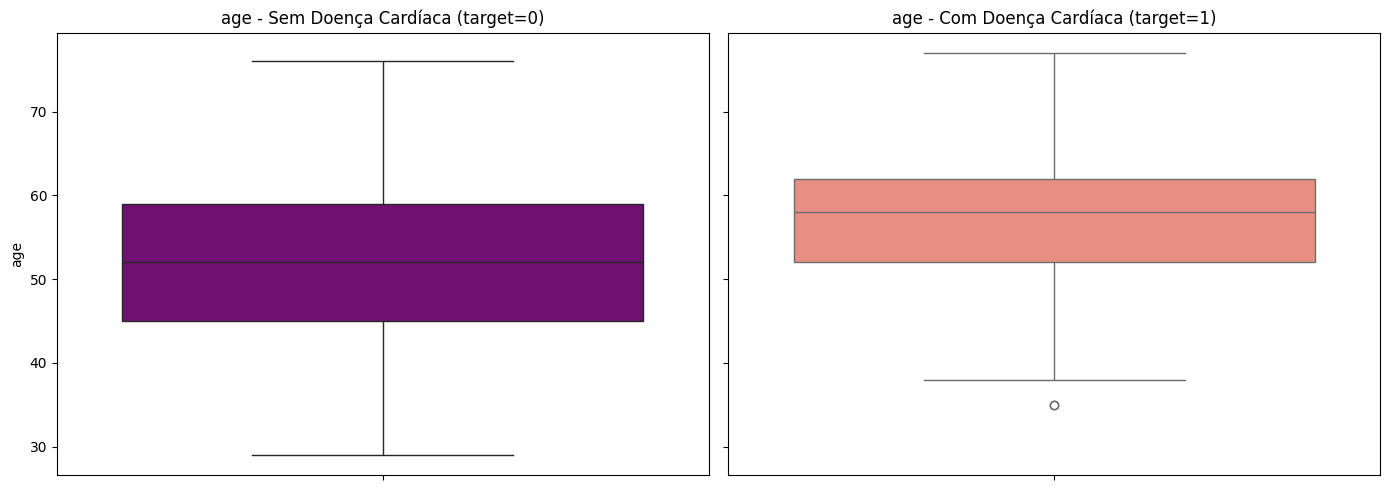

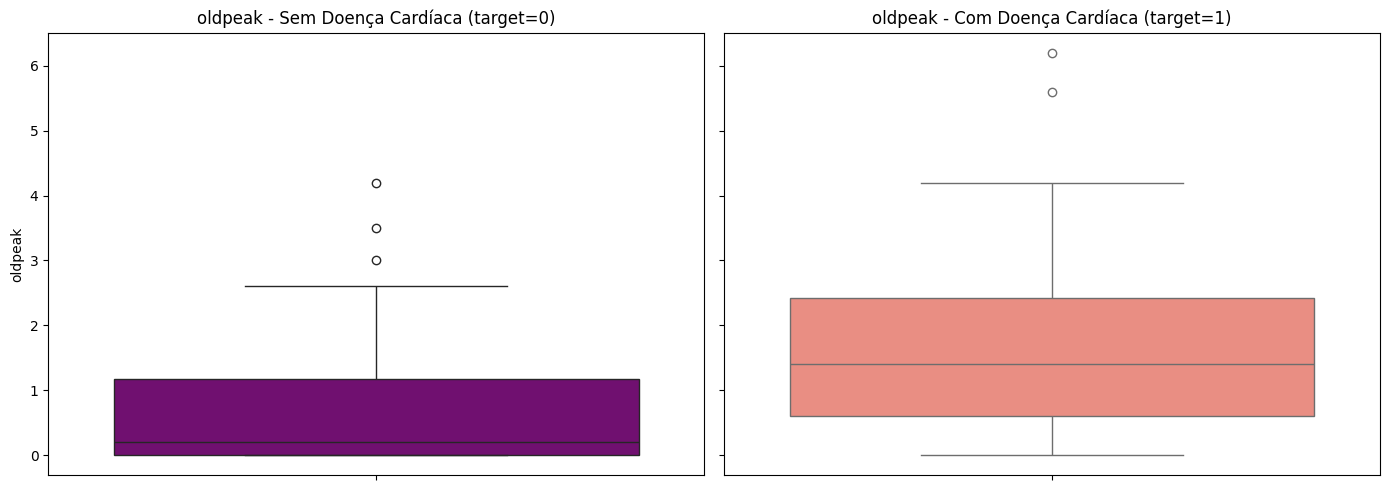

In [ ]:
#  Boxplots comparando com a variável target

for col in num_vars:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

    # Boxplot para target = 0
    sns.boxplot(
        data=df[df['target'] == 0],
        y=col,
        color='purple',
        ax=axes[0]
    )
    axes[0].set_title(f'{col} - Sem Doença Cardíaca (target=0)')
    axes[0].set_ylabel(col)

    # Boxplot para target = 1
    sns.boxplot(
        data=df[df['target'] == 1],
        y=col,
        color='salmon',
        ax=axes[1]
    )
    axes[1].set_title(f'{col} - Com Doença Cardíaca (target=1)')
    axes[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()


## Análise das Variáveis Categórias

In [ ]:
# selecionando as colunas categoricas

cols = df.select_dtypes(include=['category'])
cols.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], dtype='object')

### Aplicando a cross table

In [ ]:

###### A crosstab (tabela cruzada) mostra como duas variáveis categóricas se relacionam entre si.
###### Como variáveis categoricas se distribuem em relação à variável target

for col in cols:
    print(f"\n Variável: {col}")
    ct = pd.crosstab(df[col], df['target'], normalize='index')
    ct.columns = ['Sem Doença (0)', 'Com Doença (1)']
    ct = ct.sort_values(by='Com Doença (1)', ascending=False)
    print(ct.round(3))
    top_cat = ct.index[0]
    pct = ct.iloc[0]['Com Doença (1)']
    print(f"Categoria com maior risco: {col} = {top_cat} (Proporção com doença: {pct:.2f})")


 Variável: sex
     Sem Doença (0)  Com Doença (1)
sex                                
1             0.454           0.546
0             0.770           0.230
Categoria com maior risco: sex = 1 (Proporção com doença: 0.55)

 Variável: cp
    Sem Doença (0)  Com Doença (1)
cp                                
3            0.295           0.705
0            0.750           0.250
2            0.785           0.215
1            0.833           0.167
Categoria com maior risco: cp = 3 (Proporção com doença: 0.71)

 Variável: fbs
     Sem Doença (0)  Com Doença (1)
fbs                                
0             0.552           0.448
1             0.575           0.425
Categoria com maior risco: fbs = 0 (Proporção com doença: 0.45)

 Variável: restecg
         Sem Doença (0)  Com Doença (1)
restecg                                
2                 0.467           0.533
1                 0.500           0.500
0                 0.649           0.351
Categoria com maior risco: restecg = 2 (Prop

As variáveis com forte associação com a presença de doença (target = 1) incluem:
- sex = 1 (homem)
- cp = 3 (tipo de dor no peito)
- restecg (tipo 2)
- exang = 1 (angina induzida)
- slope = 1 ou 2
- ca = 1, 2, 3 (vasos alterados)
- thal = 2 ou 3

**Fbs não parecem relevantes nessa base.**

### Selecionando Variáveis Relevantes

In [ ]:
cols_relevantes = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

### Gráficos de Distribuicão

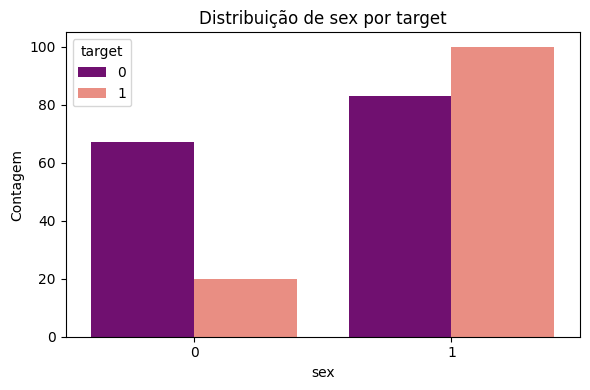

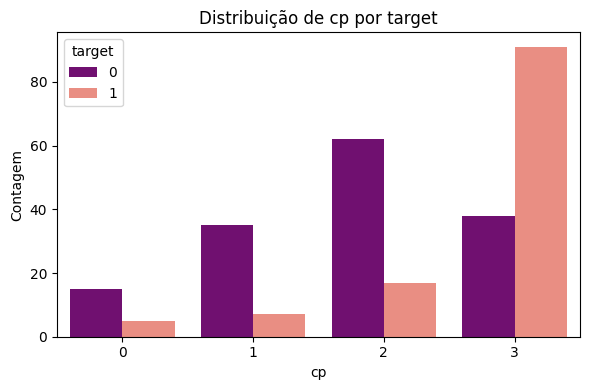

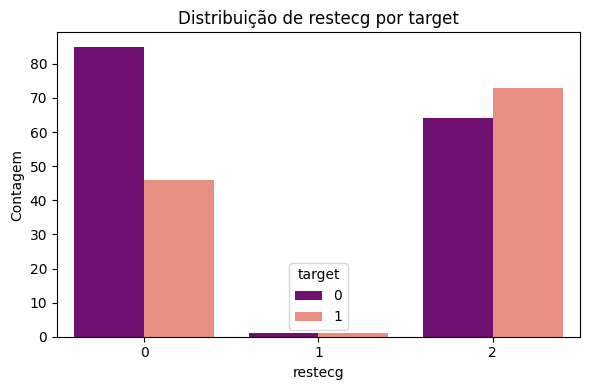

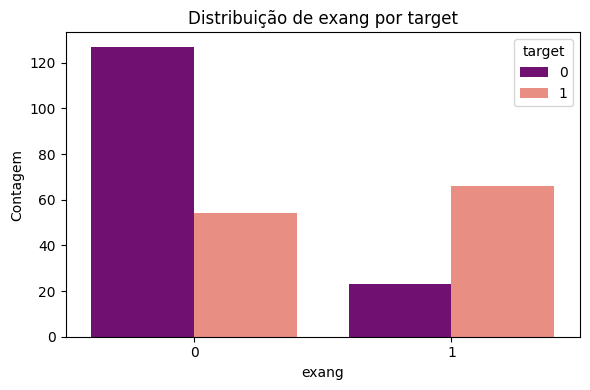

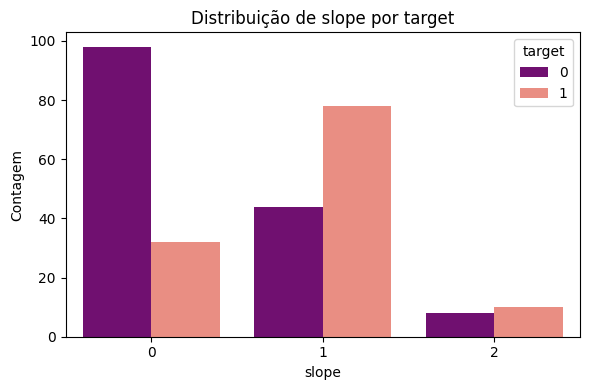

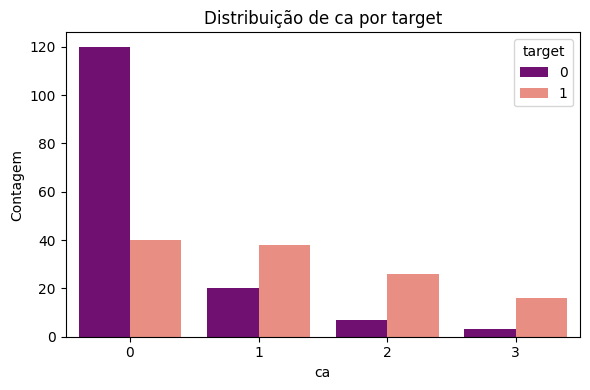

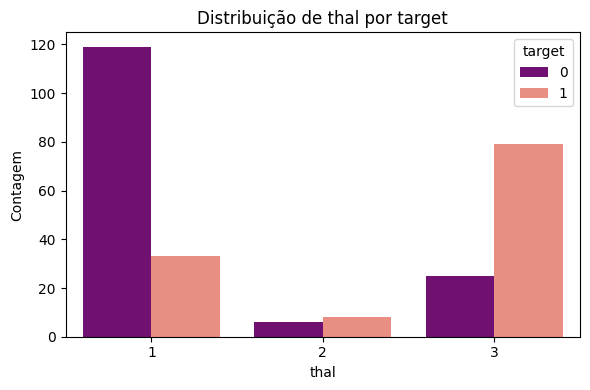

In [ ]:
palette_colors = {0: 'purple', 1: 'salmon'}

for col in cols_relevantes:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='target', palette=palette_colors)
    plt.title(f'Distribuição de {col} por target')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.tight_layout()
    plt.show()

### Filtrando as variáveis a serem utilizadas & Conversao das variáveis categóricas em dummies

In [ ]:
df_filtrado = df[['age','oldpeak','sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal','target' ]]


In [ ]:
#### criando as categoricas
df_features =pd.get_dummies(df_filtrado, columns=['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal'],dtype=int)

In [ ]:
df_features

,age,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,restecg_0,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3
0,70,2.4,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
1,67,1.6,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,57,0.3,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,64,0.2,0,0,1,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
4,74,0.2,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,0.5,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
266,44,0.0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
267,56,1.3,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
268,57,0.4,0,0,1,0,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0


# 2 - Preparação dos Dados - Regressao Logistica

### Separação em treino e teste

In [ ]:
# Separando as variáveis independentes e alvo

# x contem as variaveis explicativas
X = df_features.drop('target', axis=1)

# y contem a variavel de interesse
y = df_features['target']

# Divisão aleatória com estratificação (deixando 80% treino 20% teste)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#______________________________________________________________________________________________________
# random_state=42 - Garante que a divisão dos dados será sempre a mesma toda vez que rodar o código (reprodutibilidade).
# stratify=y - Garante que a proporção das classes em y será mantida nos dois conjuntos (treino e teste).
#    Isso é importante em problemas de classificação, principalmente quando há classes desbalanceada, evitando que o modelo aprenda com dados desbalanceados.

### Visualisacao do balanceamento da base de teste/ treino

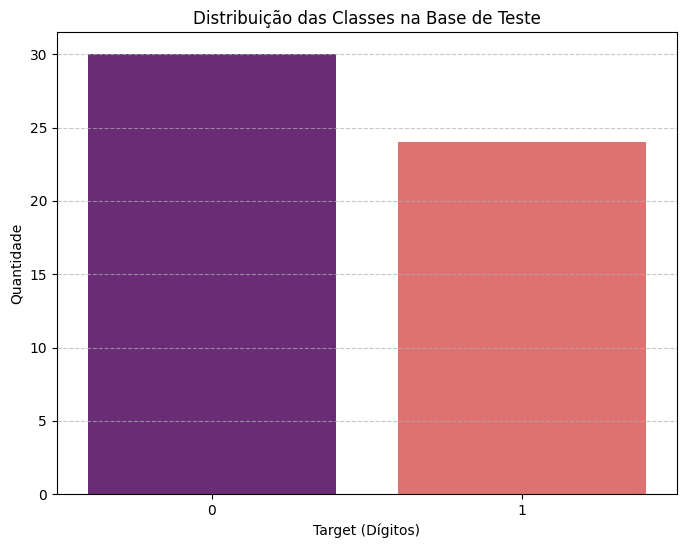

In [ ]:
# Visualizando o balanceamento da base de teste
y_test_series = pd.Series(y_test)

plt.figure(figsize=(8, 6))
sns.countplot(x=y_test_series, palette='magma')

plt.title("Distribuição das Classes na Base de Teste")
plt.xlabel("Target (Dígitos)")
plt.ylabel("Quantidade")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Proporção das classes na base de teste
test_percent = pd.Series(y_test).value_counts(normalize=True).sort_index() * 100

# Exibir valores formatados
for classe, porcentagem in test_percent.items():
    print(f"Classe {classe}: {porcentagem:.2f}%")

Classe 0: 55.56%
Classe 1: 44.44%


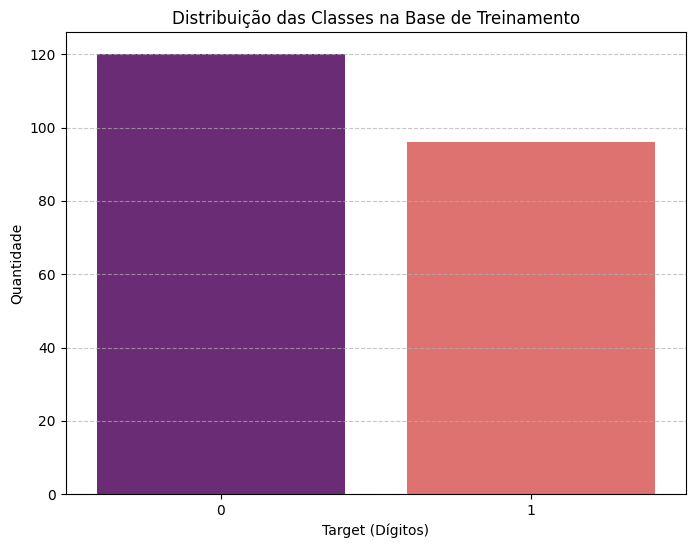

In [ ]:
# Visualizando o balanceamento da base de treino
y_train_series = pd.Series(y_train)

plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_series, palette='magma')

plt.title("Distribuição das Classes na Base de Treinamento")
plt.xlabel("Target (Dígitos)")
plt.ylabel("Quantidade")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Proporção das classes na base de treinamento
train_percent = pd.Series(y_train).value_counts(normalize=True).sort_index() * 100

# Exibir valores formatados
for classe, porcentagem in train_percent.items():
    print(f"Classe {classe}: {porcentagem:.2f}%")

Classe 0: 55.56%
Classe 1: 44.44%


### Fit do Modelo

In [ ]:
#Fit do modelo
###### O modelo “aprende” a relação entre os dados (X_train) e os resultados (y_train)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### Aplicando o modelo fitado na base de teste

In [ ]:
y_pred = logreg.predict(X_test) ### Aplicação do Modelo
y_pred_proba = logreg.predict_proba(X_test)[:, 1] ### Previsão da Probabilidade

### Previsões do Modelo

In [ ]:
# mostrnado o output
X_test["Previsao_Modelo"] = y_pred
X_test["Probabilidade_Doença Cardíaca"] = y_pred_proba

X_test

,age,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_3,Previsao_Modelo,Probabilidade_Doença Cardíaca
195,55,1.4,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0.096650
132,42,0.0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,0.141617
162,55,0.0,0,1,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0.047324
129,60,1.4,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,1,1,0.942442
66,51,0.0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0.329970
254,59,1.6,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0.074888
38,42,0.0,0,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0.031802
65,57,0.6,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0.953458
97,58,0.1,0,1,0,0,0,1,1,0,...,0,0,1,0,0,0,0,1,1,0.818421
61,51,1.2,1,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0.690905


Text(0.5, 1.0, 'Contagem: Previsao Modelo')

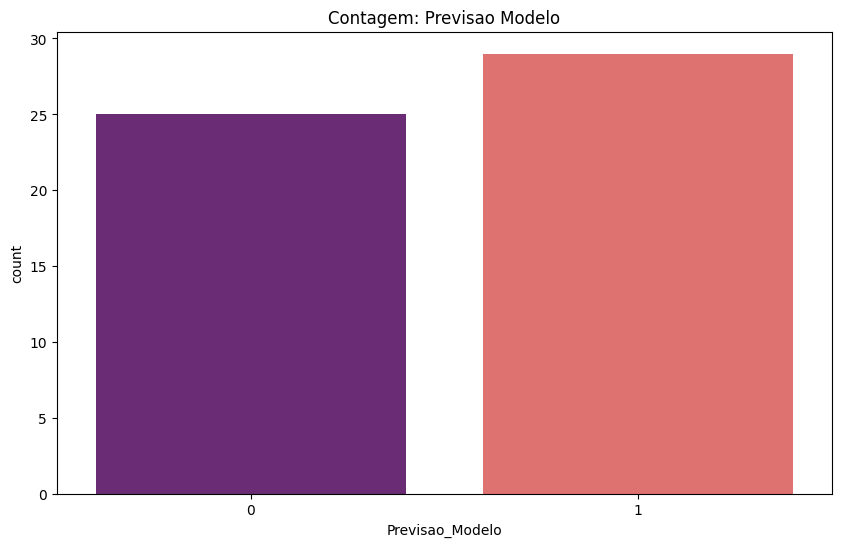

In [ ]:
palette = sns.color_palette("magma", len(X_test["Previsao_Modelo"].unique()))

plt.figure(figsize=(10, 6))
sns.countplot(X_test, x="Previsao_Modelo",palette=palette).set_title('Contagem: Previsao Modelo')

### Performance do Modelo

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

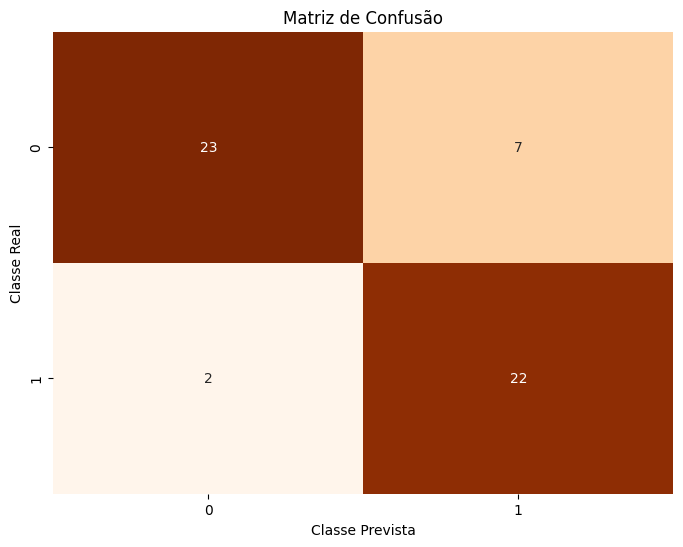

Acurácia: 0.8333333333333334
Precisão: 0.7586206896551724
Recall: 0.9166666666666666
F1-score: 0.8301886792452831


In [ ]:
# Calculando matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Calculando métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Oranges', fmt='g', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

# Imprimindo as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

* Verdadeiro Negativo = 23 → modelo acertou: previu que não tinha doença, e realmente não tinha. ACERTOU!
* Falso Positivo = 7 → modelo errou: disse que tinha doença, mas a pessoa estava saudável.
* Falso Negativo = 2 → modelo errou: disse que estava saudável, mas a pessoa tinha doença (erro mais grave).
* Verdadeiro Positivo = 22 → modelo acertou: previu que tinha doença, e realmente tinha. ACERTOU!

- Alto recall (91%) = Detecta quase todos os doentes.
- Precisão moderada (76%) = As vezes em que o modelo disse que havia doença, 76% estavam corretas.
- F1-score bom (83%) =Mostra que o modelo está bom tanto para evitar alarmes falsos quanto para detectar casos reais.
- Acurácia (83%) = O modelo acertou 83% das previsões.


### **Considerando que a prioridade é detectar todos os doentes (evitar falsos negativos), avaliamos esse modelo ajustado!**





### Obtendo as variáveis mais relevantes do modelo

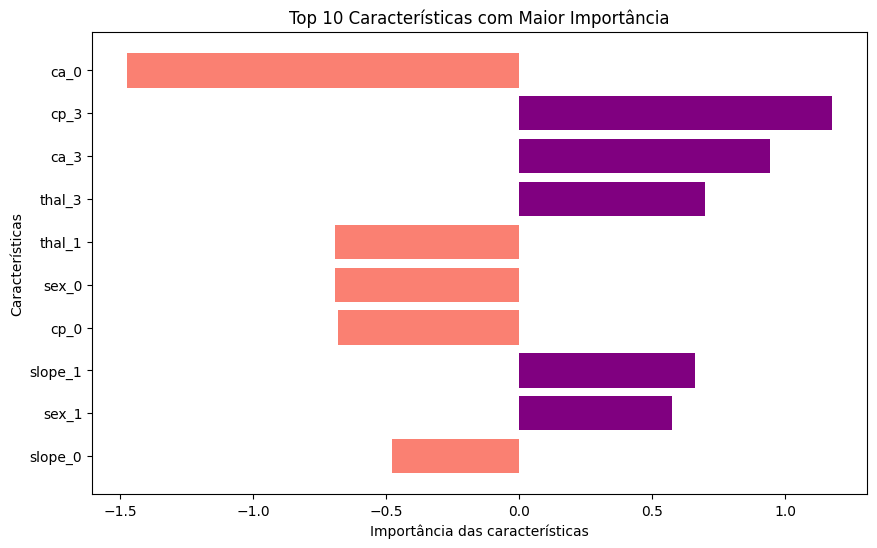

In [ ]:
# Obtendo os coeficientes do modelo (importância das características)
coefficients = logreg.coef_[0]
feature_names = X.columns

# Ordenando os índices das características pelos coeficientes
indices = np.argsort(np.abs(coefficients))

# Top 10 características com maior importância
top_features = feature_names[indices][-10:]
top_importances = coefficients[indices][-10:]

# Plotando as top features com suas importâncias
# Define as cores: verde para coeficientes positivos, vermelho para negativos
colors = ['purple' if val > 0 else 'salmon' for val in top_importances]

plt.figure(figsize=(10,6))
plt.barh(top_features, top_importances, color=colors)
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.title('Top 10 Características com Maior Importância')
plt.show()

Coeficientes

In [ ]:
# Criando um DataFrame para a tabela de regressão
regression_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Ordenando as features pelos coeficientes em ordem decrescente
regression_table = regression_table.reindex(regression_table['Coefficient'].abs().sort_values(ascending=False).index)

# Exibindo a tabela
print(regression_table)

      Feature  Coefficient
16       ca_0    -1.472357
7        cp_3     1.175457
19       ca_3     0.941574
22     thal_3     0.698353
20     thal_1    -0.692501
2       sex_0    -0.692469
4        cp_0    -0.678597
14    slope_1     0.660652
3       sex_1     0.574300
13    slope_0    -0.478918
1     oldpeak     0.439793
6        cp_2    -0.438516
11    exang_0    -0.414029
8   restecg_0    -0.356300
9   restecg_1     0.315701
15    slope_2    -0.299902
12    exang_1     0.295860
17       ca_1     0.213782
18       ca_2     0.198832
5        cp_1    -0.176513
21     thal_2    -0.124020
10  restecg_2    -0.077570
0         age     0.011665


# Insigths

- Apesar de a pressão arterial elevada ser um fator de risco conhecido para condições de saúde graves, como o infarto, nesta base de dados o atributo relacionado à pressão (trestbps) não apresentou relevância significativa na detecção da doença cardíaca.

- A análise exploratória indicou 9 atributos com relação significativa à presença de doença cardíaca:

    - age: Idade dos pacientes em anos
    - sex: Sexo
    - cp: Tipo de dor torácica
    - restecg: Resultado do eletrocardiograma em repouso
    - exang: Angina induzida pelo exercício
    - oldpeak: Depressão do ST induzida pelo exercício em  relação ao repouso
    - slope: Inclinação do segmento ST
    - ca: Número de vasos principais
    - thal: Talassemia

- A performance do modelo mostrou-se adequada na detecção de doenças cardíacas, mesmo sem a normalização das variáveis explicativas.

- Os atributos que tiveram maior importância para detectar doença cardíaca no modelo de regressão foram:
	- cp: Tipo de dor torácica
	- ca: Número de vasos principais
	- thal: Talassemia
	- sex: Sexo
	- slope: Inclinação do segmento ST